# Used Car Price Prediction 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
car = pd.read_excel('C:/Users/Hp/Documents/cardata.xlsx')

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40 kms,Diesel
4,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
car.shape

(1784, 6)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784 entries, 0 to 1783
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 83.8+ KB


In [6]:
car['year'].unique()

array([nan, 2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017,
       2008, 2011, 2019, 2009, 2005, 2000, '...', '150k', 'TOUR', 2003,
       'r 15', 2004, 'Zest', '/-Rs', 'sale', 1995, 'ara)', 2002, 'SELL',
       2001, 'tion', 'odel', '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi',
       'car', 'able', 'no.', 'd...', 'SALE', 'digo', 'sell', 'd Ex',
       'n...', 'e...', 'D...', ', Ac', 'go .', 'k...', 'o c4', 'zire',
       'cent', 'Sumo', 'cab', 't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [7]:
car['Price'].unique()

array([nan, 80000, 425000, 'Ask For Price', 325000, 575000, 175000,
       190000, 830000, 250000, 182000, 315000, 415000, 320000, 1000000,
       500000, 350000, 160000, 310000, 75000, 100000, 290000, 95000,
       180000, 385000, 105000, 650000, 689999, 448000, 549000, 501000,
       489999, 280000, 349999, 284999, 345000, 499999, 235000, 249999,
       1475000, 395000, 220000, 170000, 85000, 200000, 570000, 110000,
       448999, 1891111, 159500, 344999, 449999, 865000, 699000, 375000,
       224999, 1200000, 195000, 351000, 240000, 90000, 155000, 600000,
       189500, 210000, 390000, 135000, 1600000, 701000, 265000, 525000,
       372000, 635000, 550000, 485000, 329500, 251111, 569999, 69999,
       299999, 399999, 450000, 270000, 158400, 179000, 125000, 299000,
       150000, 275000, 285000, 340000, 70000, 289999, 849999, 749999,
       274999, 984999, 599999, 244999, 474999, 245000, 169500, 370000,
       168000, 145000, 98500, 209000, 185000, 900000, 699999, 199999,
       5449

In [8]:
car['kms_driven'].unique()

array([nan, '45,000 kms', '40 kms', '22,000 kms', '28,000 kms',
       '36,000 kms', '59,000 kms', '41,000 kms', '25,000 kms',
       '24,530 kms', '60,000 kms', '30,000 kms', '32,000 kms',
       '48,660 kms', '4,000 kms', '16,934 kms', '43,000 kms',
       '35,550 kms', '39,522 kms', '39,000 kms', '55,000 kms',
       '72,000 kms', '15,975 kms', '70,000 kms', '23,452 kms',
       '35,522 kms', '48,508 kms', '15,487 kms', '82,000 kms',
       '20,000 kms', '68,000 kms', '38,000 kms', '27,000 kms',
       '33,000 kms', '46,000 kms', '16,000 kms', '47,000 kms',
       '35,000 kms', '30,874 kms', '15,000 kms', '29,685 kms',
       '1,30,000 kms', '19,000 kms', '54,000 kms', '13,000 kms',
       '38,200 kms', '50,000 kms', '13,500 kms', '3,600 kms',
       '45,863 kms', '60,500 kms', '12,500 kms', '18,000 kms',
       '13,349 kms', '29,000 kms', '44,000 kms', '42,000 kms',
       '14,000 kms', '49,000 kms', '36,200 kms', '51,000 kms',
       '1,04,000 kms', '33,333 kms', '33,600 kms', '5,

In [9]:
car['fuel_type'].unique()

array([nan, 'Petrol', 'Diesel', 'LPG'], dtype=object)

### Quality of Data
- Has a lot of blank rows
- Year has many non-year values
- Year object to int
- Price has 'ask for price'
- Price Object to int
- kms_driven has kms with integers
- kms_diven object to int
- kms_driven has nan values
- fuel_type has nan value
- We're going to keep first 3 words of Name


###  Cleaning

In [10]:
#Creating backup so that we won't loose the original data
backup = car.copy()

In [11]:
#To get rid of the empty rows
car=car.dropna()
car

,name,company,year,Price,kms_driven,fuel_type
1,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol
3,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40 kms,Diesel
5,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
7,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,"28,000 kms",Petrol
9,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,"36,000 kms",Diesel
...,...,...,...,...,...,...
1767,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,"50,000 kms",Petrol
1771,Tata Indica V2 DLE BS III,Tata,2009,110000,"30,000 kms",Diesel
1773,Toyota Corolla Altis,Toyota,2009,300000,"1,32,000 kms",Petrol
1777,Tata Zest XM Diesel,Tata,2018,260000,"27,000 kms",Diesel


In [12]:
#To deal with the non-year values of 'year' and converting it to integer
car['year'] = car['year'].astype(int)
car['year']

1       2007
3       2006
5       2018
7       2014
9       2014
        ... 
1767    2011
1771    2009
1773    2009
1777    2018
1779    2013
Name: year, Length: 837, dtype: int32

In [13]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 1 to 1779
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        837 non-null    object
 1   company     837 non-null    object
 2   year        837 non-null    int32 
 3   Price       837 non-null    object
 4   kms_driven  837 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.5+ KB


In [14]:
 car['Price']

1               80000
3              425000
5       Ask For Price
7              325000
9              575000
            ...      
1767           270000
1771           110000
1773           300000
1777           260000
1779           390000
Name: Price, Length: 837, dtype: object

In [15]:
#To exclude ask for price
car = car[car['Price']!='Ask For Price']
car

,name,company,year,Price,kms_driven,fuel_type
1,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol
3,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40 kms,Diesel
7,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,"28,000 kms",Petrol
9,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,"36,000 kms",Diesel
13,Ford Figo,Ford,2012,175000,"41,000 kms",Diesel
...,...,...,...,...,...,...
1767,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,"50,000 kms",Petrol
1771,Tata Indica V2 DLE BS III,Tata,2009,110000,"30,000 kms",Diesel
1773,Toyota Corolla Altis,Toyota,2009,300000,"1,32,000 kms",Petrol
1777,Tata Zest XM Diesel,Tata,2018,260000,"27,000 kms",Diesel


In [16]:
#replaing the commas
car['Price'] = car['Price'].replace(',','').astype(int)
car['Price']

<ipython-input-16-a60a59f2056f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['Price'] = car['Price'].replace(',','').astype(int)


1        80000
3       425000
7       325000
9       575000
13      175000
         ...  
1767    270000
1771    110000
1773    300000
1777    260000
1779    390000
Name: Price, Length: 816, dtype: int32

In [17]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 1 to 1779
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.2+ KB


In [18]:
car['kms_driven']

1         45,000 kms
3             40 kms
7         28,000 kms
9         36,000 kms
13        41,000 kms
            ...     
1767      50,000 kms
1771      30,000 kms
1773    1,32,000 kms
1777      27,000 kms
1779      40,000 kms
Name: kms_driven, Length: 816, dtype: object

In [19]:
# To get rid of kms we can split
car['kms_driven']=car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')#used get(0) to keep only the first element after splitting
car['kms_driven']

<ipython-input-19-6ed0d2f87577>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['kms_driven']=car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')#used get(0) to keep only the first element after splitting


1        45000
3           40
7        28000
9        36000
13       41000
         ...  
1767     50000
1771     30000
1773    132000
1777     27000
1779     40000
Name: kms_driven, Length: 816, dtype: object

In [20]:
#to make sure it has only numeric values 
car = car[car['kms_driven'].str.isnumeric()]

In [21]:
car.info() #we can see there are still object value in kms_driven

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 1 to 1779
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.2+ KB


In [22]:
# converting into int
car['kms_driven'] = car['kms_driven'].astype(int)
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 1 to 1779
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


###### fuel_type has nan value

In [23]:
# to get where fuel_type is nan
car[car['fuel_type'].isna()]

,name,company,year,Price,kms_driven,fuel_type


###### To keep First 3 words in name

In [24]:
car['name']

1         Hyundai Santro Xing XO eRLX Euro III
3                      Mahindra Jeep CL550 MDI
7       Hyundai Grand i10 Magna 1.2 Kappa VTVT
9             Ford EcoSport Titanium 1.5L TDCi
13                                   Ford Figo
                         ...                  
1767                Maruti Suzuki Ritz VXI ABS
1771                 Tata Indica V2 DLE BS III
1773                      Toyota Corolla Altis
1777                       Tata Zest XM Diesel
1779                        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [25]:
car['name'].str.split(' ') #splitting the words with space

1         [Hyundai, Santro, Xing, XO, eRLX, Euro, III]
3                         [Mahindra, Jeep, CL550, MDI]
7       [Hyundai, Grand, i10, Magna, 1.2, Kappa, VTVT]
9               [Ford, EcoSport, Titanium, 1.5L, TDCi]
13                                        [Ford, Figo]
                             ...                      
1767                  [Maruti, Suzuki, Ritz, VXI, ABS]
1771                  [Tata, Indica, V2, DLE, BS, III]
1773                          [Toyota, Corolla, Altis]
1777                          [Tata, Zest, XM, Diesel]
1779                            [Mahindra, Quanto, C8]
Name: name, Length: 816, dtype: object

In [26]:
car['name'] = car['name'].str.split(' ').str.slice(0,3).str.join(' ') # keeping only three words and joining them again
car['name']

1          Hyundai Santro Xing
3          Mahindra Jeep CL550
7            Hyundai Grand i10
9       Ford EcoSport Titanium
13                   Ford Figo
                 ...          
1767        Maruti Suzuki Ritz
1771            Tata Indica V2
1773      Toyota Corolla Altis
1777              Tata Zest XM
1779        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [27]:
#To reset the index
car = car.reset_index(drop=True)
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [28]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [29]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


###### analysis
- We can see that 75% of the cars' price5L but the rest are more than 5L and max is 8.5. So it must be an outlier.

In [30]:
#let's check how many cars are above 50,00,000
car[car['Price']>5e6] #5e6=50,00,000

,name,company,year,Price,kms_driven,fuel_type
534,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [31]:
#To remove this outlier
car = car[car['Price']<5e6].reset_index(drop = True) # resetting the index and droppng the outlier
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [32]:
# Storing the cleaned data
car.to_csv('Cleaned_CarData.csv')

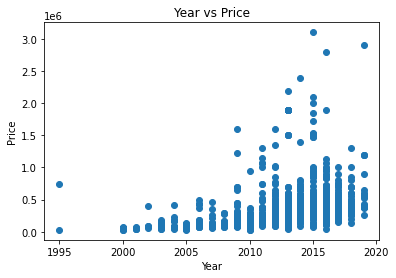

In [33]:
import matplotlib.pyplot as plt
#year vs Price
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.scatter(car.year,car.Price)

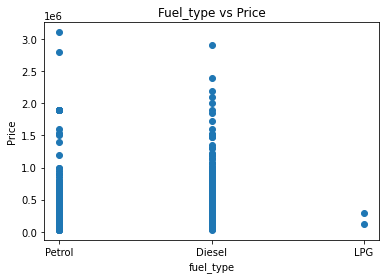

In [34]:
#fuel_type vs Price
plt.title('Fuel_type vs Price')
plt.xlabel('fuel_type')
plt.ylabel('Price')
plt.scatter(car.fuel_type,car.Price)

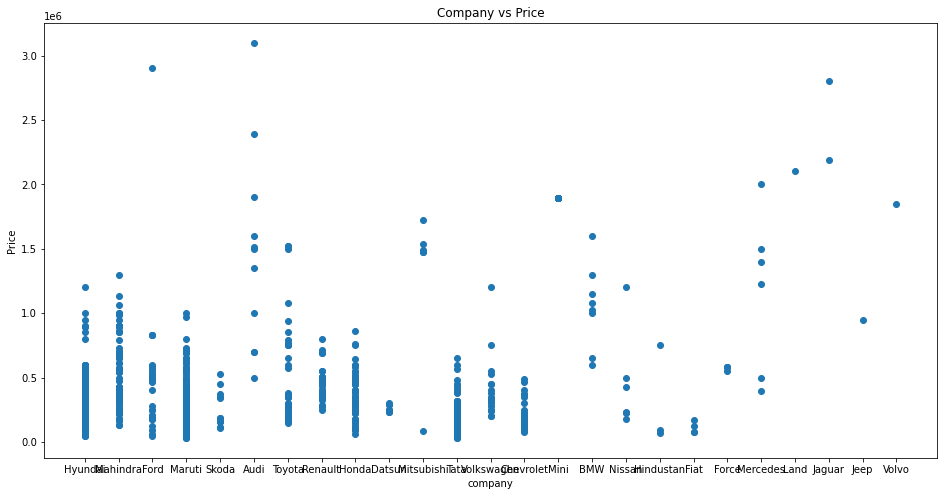

In [35]:
#Company vs Price
plt.figure(figsize = (16,8))
plt.title('Company vs Price')
plt.xlabel('company')
plt.ylabel('Price')
plt.scatter(car.company,car.Price)

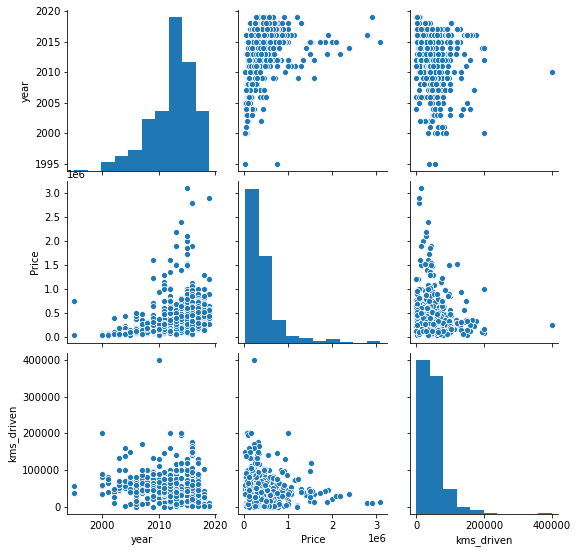

In [36]:
sns.pairplot(car)

### Model

In [37]:
#Extracting Features and Target
x = car.drop(columns = 'Price')
y = car['Price']

In [38]:
x

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
811,Tata Indica V2,Tata,2009,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,132000,Petrol
813,Tata Zest XM,Tata,2018,27000,Diesel


In [39]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
810    270000
811    110000
812    300000
813    260000
814    390000
Name: Price, Length: 815, dtype: int32

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2) 

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [42]:
ohe = OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder()

In [43]:
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [44]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder = 'passthrough')

In [45]:
lr = LinearRegression()

In [46]:
pipe = make_pipeline(column_trans,lr)

In [47]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [48]:
y_pred = pipe.predict(x_test)

In [49]:
y_pred

array([ 397534.02827279,  259173.83630724,  457884.0691195 ,
        229680.15053019,  583123.70147656,  501826.56857357,
        115732.91432898,  359043.67204763,  216379.30427506,
       1365412.37069032,  441563.0616188 ,  840194.19030872,
         96214.48553187,  518720.92197074,  306871.27081207,
         37218.89007114,  297690.48421214,  244898.78028646,
        478789.67474464,  536902.19700235,  508788.48879747,
        197951.37053601,  140763.62661734,  238067.14344092,
        197103.20679481, 1483537.70778165,  507567.57581004,
        246552.21402746,  570680.08674899,  440719.80366775,
         93662.59221471,  498119.49232358,  133079.29481003,
        171169.07506444,  504519.61934124,   93455.23511957,
        297424.97633483,  648215.39961018,  294090.03107608,
        211742.06392505,  128926.57636969,  357294.62838563,
        245384.34496585,  393079.56804816,  134051.91463754,
        152421.30006067,  -41833.76893236,  709416.66556796,
        375712.58358219,

In [50]:
r2_score(y_test,y_pred)

0.6407315695236346

In [51]:
scores=[]
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))
    

In [52]:
np.argmax(scores)

4

In [53]:
scores[np.argmax(scores)]

0.8538307173340905

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
r2_score(y_test,y_pred)

0.8538307173340905

In [55]:
import pickle

In [56]:
pickle.dump(pipe,open('LRmodel.pkl','wb'))

In [57]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']],columns=['name','company','year','kms_driven','fuel_type']))

array([422752.52628912])

######    The Price of the car is 4,22,752